# UFC Data visualization
Data taken from Kaggle. 
Things to be visualized: 
    - age if its related to result
    - most popular venue
    - most popular way to end the fight
    - comparing techniques used 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [35]:
file_path = 'data/data.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,B__Round1_Strikes_Body Total Strikes_Attempts,B__Round1_Strikes_Body Total Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Attempts,B__Round1_Strikes_Clinch Body Strikes_Landed,B__Round1_Strikes_Clinch Head Strikes_Attempts,B__Round1_Strikes_Clinch Head Strikes_Landed,B__Round1_Strikes_Clinch Leg Strikes_Attempts,B__Round1_Strikes_Clinch Leg Strikes_Landed,B__Round1_Strikes_Clinch Significant Kicks_Attempts,B__Round1_Strikes_Clinch Significant Kicks_Landed,B__Round1_Strikes_Clinch Significant Punches_Attempts,B__Round1_Strikes_Clinch Significant Punches_Landed,B__Round1_Strikes_Clinch Significant Strikes_Attempts,B__Round1_Strikes_Clinch Significant Strikes_Landed,B__Round1_Strikes_Clinch Total Strikes_Attempts,B__Round1_Strikes_Clinch Total Strikes_Landed,B__Round1_Strikes_Distance Body Kicks_Attempts,B__Round1_Strikes_Distance Body Kicks_Landed,B__Round1_Strikes_Distance Body Punches_Attempts,B__Round1_Strikes_Distance Body Punches_Landed,B__Round1_Strikes_Distance Body Strikes_Attempts,B__Round1_Strikes_Distance Body Strikes_Landed,B__Round1_Strikes_Distance Head Kicks_Attempts,B__Round1_Strikes_Distance Head Kicks_Landed,B__Round1_Strikes_Distance Head Punches_Attempts,B__Round1_Strikes_Distance Head Punches_Landed,B__Round1_Strikes_Distance Head Strikes_Attempts,B__Round1_Strikes_Distance Head Strikes_Landed,B__Round1_Strikes_Distance Leg Kicks_Attempts,B__Round1_Strikes_Distance Leg Kicks_Landed,B__Round1_Strikes_Distance Leg Strikes_Attempts,B__Round1_Strikes_Distance Leg Strikes_Landed,B__Round1_Strikes_Distance Strikes_Attempts,B__Round1_Strikes_Distance Strikes_Landed,B__Round1_Strikes_Ground Body Strikes_Attempts,B__Round1_Strikes_Ground Body Strikes_Landed,B__Round1_Strikes_Ground Head Strikes_Attempts,B__Round1_Strikes_Ground Head Strikes_Landed,B__Round1_Strikes_Ground Leg Strikes_Attempts,B__Round1_Strikes_Ground Leg Strikes_Landed,B__Round1_Strikes_Ground Significant Kicks_Attempts,B__Round1_Strikes_Ground Significant Kicks_Landed,B__Round1_Strikes_Ground Significant Punches_Attempts,B__Round1_Strikes_Ground Significant Punches_Landed,B__Round1_Strikes_Ground Significant Strikes_Attempts,B__Round1_Strikes_Ground Significant Strikes_Landed,B__Round1_Strikes_Ground Total Strikes_Attempts,B__Round1_Strikes_Ground Total Strikes_Landed,B__Round1_Strikes_Head Significant Strikes_Attempts,B__Round1_Strikes_Head Significant Strikes_Landed,B__Round1_Strikes_Head Total Strikes_Attempts,B__Round1_Strikes_Head Total Strikes_Landed,B__Round1_Strikes_Kicks_Attempts,B__Round1_Strikes_Kicks_Landed,B__Round1_Strikes_Knock Down_Landed,B__Round1_Strikes_Leg Total Strikes_Attempts,B__Round1_Strikes_Leg Total Strikes_Landed,B__Round1_Strikes_Legs Significant Strikes_Attempts,B__Round1_Strikes_Legs Significant Strikes_Landed,B__Round1_Strikes_Legs Total Strikes_Attempts,B__Round1_Strikes_Legs Total Strikes_Landed,B__Round1_Strikes_Punches_Attempts,B__Round1_Strikes_Punches_Landed,B__Round1_Strikes_Significant Strikes_Attempts,B__Round1_Strikes_Significant Strikes_Landed,B__Round1_Strikes_Total Strikes_Attempts,B__Round1_Strikes_Total Strikes_Landed,B__Round1_TIP_Back Control Time,B__Round1_TIP_Clinch Time,B__Round1_TIP_Control Time,B__Round1_TIP_Distance Time,B__Round1_TIP_Ground Control Time,B__Round1_TIP_Ground Time,B__Round1_TIP_Guard Control Time,B__Round1_TIP_Half Guard Control Time,B__Round1_TIP_Misc. Ground Control Time,B__Round1_TIP_Mount Control Time,B__Round1_TIP_Neutral Time,B__Round1_TIP_Side Control Time,B__Round1_TIP_Standing Time,B__Round2_Grappling_Reversals_Landed,B__Round2_Grappling_Standups_Landed,B__Round2_Grappling_Submissions_Attempts,B__Round2_Gra

In [13]:
data.columns.tolist()

['BPrev',
 'BStreak',
 'B_Age',
 'B_Height',
 'B_HomeTown',
 'B_ID',
 'B_Location',
 'B_Name',
 'B_Weight',
 'B__Round1_Grappling_Reversals_Landed',
 'B__Round1_Grappling_Standups_Landed',
 'B__Round1_Grappling_Submissions_Attempts',
 'B__Round1_Grappling_Takedowns_Attempts',
 'B__Round1_Grappling_Takedowns_Landed',
 'B__Round1_Strikes_Body Significant Strikes_Attempts',
 'B__Round1_Strikes_Body Significant Strikes_Landed',
 'B__Round1_Strikes_Body Total Strikes_Attempts',
 'B__Round1_Strikes_Body Total Strikes_Landed',
 'B__Round1_Strikes_Clinch Body Strikes_Attempts',
 'B__Round1_Strikes_Clinch Body Strikes_Landed',
 'B__Round1_Strikes_Clinch Head Strikes_Attempts',
 'B__Round1_Strikes_Clinch Head Strikes_Landed',
 'B__Round1_Strikes_Clinch Leg Strikes_Attempts',
 'B__Round1_Strikes_Clinch Leg Strikes_Landed',
 'B__Round1_Strikes_Clinch Significant Kicks_Attempts',
 'B__Round1_Strikes_Clinch Significant Kicks_Landed',
 'B__Round1_Strikes_Clinch Significant Punches_Attempts',
 'B__Rou

In [43]:
age_cols = ['Date', 'winner', 'B_Name', 'B_Age', 'R_Name', 'R_Age']

In [44]:
data[data['B_Age'].isnull()][age_cols]

,Date,winner,B_Name,B_Age,R_Name,R_Age
775,12/05/2016,blue,Jamie Moyle,NaN,Kailin Curran,25.0
940,08/02/2015,red,Jessica Aguilar,NaN,Claudia Gadelha,28.0
1085,07/17/2015,blue,Lyman Good,NaN,Andrew Craig,31.0


In [45]:
data[data['R_Age'].isnull()][age_cols]

,Date,winner,B_Name,B_Age,R_Name,R_Age
568,11/09/2015,blue,Matheus Nicolau,24.0,Bruno Korea,NaN


In [46]:
# fill NA age -> google fighters DOB

data.loc[775, 'B_Age'] = 26
data.loc[940, 'B_Age'] = 33
data.loc[1085, 'B_Age'] = 30
data.loc[568, 'R_Age'] = 24

In [65]:
summary_cols = ['Date',
                'winner', 'winby', 
                'B_Name', 'B_ID', 'BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_Weight', 'B_Location', 'B_HomeTown',
                'R_Name', 'R_ID', 'RPrev', 'RStreak', 'R_Age', 'R_Height', 'R_Weight', 'R_Location', 'R_HomeTown',
               ]

sumdata = data[summary_cols].copy()

In [7]:
sumdata[['Date', 'winner', 'winby', 'B_Age', 'R_Age']]

,Date,winner,winby,B_Age,R_Age
0,01/02/2017,red,DEC,23.0,27.0
1,06/30/2014,blue,SUB,32.0,29.0
2,07/27/2015,red,KO/TKO,38.0,32.0
3,10/03/2016,blue,SUB,23.0,25.0
4,08/22/2016,red,DEC,30.0,28.0
5,10/26/2015,red,DEC,38.0,30.0
6,02/22/2016,red,DEC,30.0,30.0
7,09/22/2014,blue,SUB,27.0,30.0
8,06/08/2015,red,SUB,34.0,31.0
9,03/21/2016,blue,DEC,33.0,28.0


In [8]:
sumdata['winby'].value_counts()

DEC       720
KO/TKO    458
SUB       283
Name: winby, dtype: int64

__Target: Find out golden age for MMA__
    
1. get average age of winner
2. heatmap of age win pct

#2 to see, what age is winning the most, against what age

In [ ]:
#      23  24  25 26 27  28  29 30
# 23    0  .4  .3 .3 0   .1  .2  0   
# 24    ..   
# 25    ..   
# 26   
# 27   
# 28   
# 29   
# 30   

In [50]:
sumdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BPrev,1477.0,1.735274,1.895561,0.0,0.0,1.0,3.0,11.0
BStreak,1477.0,0.654705,1.057269,0.0,0.0,0.0,1.0,7.0
B_Age,1477.0,30.951930,4.018722,20.0,28.0,31.0,34.0,46.0
B_Height,1476.0,177.451220,8.561541,152.0,172.0,177.0,182.0,213.0
B_Weight,1477.0,73.804333,14.980531,52.0,65.0,70.0,84.0,120.0
RPrev,1477.0,2.125254,1.979199,0.0,1.0,2.0,3.0,12.0
RStreak,1477.0,0.721733,1.136555,0.0,0.0,0.0,1.0,9.0
R_Age,1477.0,31.375085,4.102036,21.0,28.0,31.0,34.0,46.0
R_Height,1477.0,177.436696,8.667657,154.0,172.0,177.0,185.0,213.0
R_Weight,1477.0,73.935003,15.069751,52.0,65.0,70.0,84.0,120.0


In [51]:
sumdata.dtypes

Date          datetime64[ns]
winner                object
winby                 object
BPrev                  int64
BStreak                int64
B_Age                  int64
B_Height             float64
B_Weight               int64
B_Location            object
B_HomeTown            object
RPrev                  int64
RStreak                int64
R_Age                  int64
R_Height               int64
R_Weight               int64
R_Location            object
R_HomeTown            object
dtype: object

In [66]:
sumdata['Date'] = pd.to_datetime(sumdata['Date'])
sumdata['B_Age'] = sumdata['B_Age'].astype('int')
sumdata['R_Age'] = sumdata['R_Age'].astype('int')

In [67]:
sumdata['B_Age'].isnull().sum(), sumdata['R_Age'].isnull().sum()

(0, 0)

In [68]:
age_list = sumdata['B_Age'].unique().tolist() + sumdata['R_Age'].unique().tolist()
age_list = set(age_list)
age_list = (list(age_list))
age_list.sort()

In [69]:
age_list 

[20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46]

In [171]:
age_matrix = pd.DataFrame(data=0, index=age_list, columns=age_list)

In [172]:
# age_matrix.loc[20][21]
age_matrix
# need this to normalization
age_matrix_temp = age_matrix.copy()

In [173]:
  
for index, row in age_matrix.iterrows():
#     print("Index:", index)
    for i, dat in sumdata.iterrows():
#         print("B_Age: {}, R_Age: {}".format(dat['B_Age'], dat['R_Age']))
        
        if dat['B_Age'] == index:
#             print("B_Age == index.", dat['B_Age'], dat['R_Age'])
            if dat['winner'] == 'red':
                age_matrix[index][dat['R_Age']] = age_matrix[index][dat['R_Age']] + 1
#               # age_matrix_temp will hold total number of fights per age group
                age_matrix_temp[index][dat['R_Age']] = age_matrix_temp[index][dat['R_Age']] + 1
            else:
                age_matrix[index][dat['R_Age']] = age_matrix[index][dat['R_Age']] - 1
                age_matrix_temp[index][dat['R_Age']] = age_matrix_temp[index][dat['R_Age']] + 1
        
        if dat['R_Age'] == index:
#             print("R_Age == index.", dat['B_Age'], dat['R_Age'])
            if dat['winner'] == 'red':
                age_matrix[index][dat['B_Age']] = age_matrix[index][dat['B_Age']] - 1
                age_matrix_temp[index][dat['B_Age']] = age_matrix_temp[index][dat['B_Age']] + 1
            else:
                age_matrix[index][dat['B_Age']] = age_matrix[index][dat['B_Age']] + 1
                age_matrix_temp[index][dat['B_Age']] = age_matrix_temp[index][dat['B_Age']] + 1

In [174]:
age_matrix

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46
20,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,-1,2,-1,0,-1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,-1,-2,0,1,1,0,-1,-2,-1,0,2,-1,0,0,0,0,0,0,0,0,0,0
23,1,0,0,0,-1,2,1,-1,-1,0,0,0,0,1,2,2,5,0,0,0,0,0,0,0,0,0
24,0,0,1,1,0,-1,0,2,3,0,1,1,2,4,1,1,0,-1,2,0,0,0,0,0,0,0
25,0,1,2,-2,1,0,-3,7,4,2,4,6,8,2,0,0,2,6,1,1,0,0,0,0,0,0
26,0,-2,0,-1,0,3,0,-2,1,2,-1,-3,5,2,2,5,1,3,0,-2,0,0,0,0,0,0
27,0,1,-1,1,-2,-7,2,0,-3,-1,6,7,-1,4,5,-7,-4,2,2,-1,0,1,0,0,0,0
28,0,0,-1,1,-3,-4,-1,3,0,8,13,5,2,1,0,-3,1,2,1,-1,1,-1,0,0,0,0
29,0,1,0,0,0,-2,-2,1,-8,0,-4,3,2,2,7,3,0,8,4,-2,1,1,0,0,0,0


In [175]:
age_matrix_temp

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46
20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,1,2,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,1,2,0,1,1,2,1,2,1,0,2,1,0,0,0,0,0,0,0,0,0,0
23,1,0,0,0,1,2,1,3,3,2,2,2,4,3,2,2,7,0,0,0,0,0,0,0,0,0
24,0,0,1,1,4,1,4,8,7,6,5,5,2,6,1,3,0,1,4,0,0,0,0,0,0,0
25,0,1,2,2,1,8,11,9,10,10,12,6,14,10,10,6,2,6,3,1,0,0,0,0,0,0
26,0,2,0,1,4,11,8,8,13,18,17,11,15,8,4,5,1,5,0,2,0,0,0,0,0,0
27,0,1,1,3,8,9,8,14,15,15,22,15,17,16,17,13,8,6,6,3,0,1,0,0,0,0
28,0,0,1,3,7,10,13,15,22,22,25,17,26,25,10,9,7,4,3,1,1,1,0,0,0,0
29,0,1,2,2,6,10,18,15,22,32,20,15,18,22,15,13,6,12,6,2,5,3,0,0,0,0


In [166]:
# Data check !!
bage = 25
rage = 32

In [164]:
sumdata[(sumdata['B_Age'] == bage) & (sumdata['R_Age'] == rage)]['winner'].value_counts()

blue    5
red     3
Name: winner, dtype: int64

In [165]:
sumdata[(sumdata['R_Age'] == bage) & (sumdata['B_Age'] == rage)]['winner'].value_counts()

red    6
Name: winner, dtype: int64

In [144]:
sumdata[(sumdata['B_Age'] == bage) | (sumdata['R_Age'] == bage)]

,Date,winner,winby,B_Name,B_ID,BPrev,BStreak,B_Age,B_Height,B_Weight,B_Location,B_HomeTown,R_Name,R_ID,RPrev,RStreak,R_Age,R_Height,R_Weight,R_Location,R_HomeTown
31,2016-02-01,blue,SUB,Bryan Barberena,2263,2,0,27,182.0,77,"Glendale, Arizona USA","Montclair, California USA",Sage Northcutt,2628,2,2,21,182,70,"Katy, Texas USA","Houston, Texas USA"
531,2016-07-11,red,DEC,Enrique Marin,2701,1,0,30,177.0,77,"Huntington Beach, California United States","Seville, Andalusia Spain",Sage Northcutt,2628,3,0,21,182,70,"Katy, Texas USA","Houston, Texas USA"
949,2015-12-14,red,SUB,Cody Pfister,2429,2,1,26,177.0,70,"Boulder, Colorado USA","Amarillo, Texas USA",Sage Northcutt,2628,1,1,21,182,70,"Katy, Texas USA","Houston, Texas USA"
1017,2017-02-06,red,DEC,Michinori Tanaka,2210,4,0,26,165.0,61,Kanagawa Japan,Kanagawa Japan,Ricardo Ramos,2857,0,0,21,175,61,"Campinas, Sao Paulo Brazil","Campinas, Sao Paulo Brazil"
1150,2016-12-18,blue,SUB,Mickey Gall,2750,2,2,25,187.0,77,"Green Brook, New Jersey USA","Green Brook, New Jersey USA",Sage Northcutt,2628,4,1,21,182,70,"Katy, Texas USA","Houston, Texas USA"
1260,2016-09-05,red,KO/TKO,Veronica Macedo,2816,0,0,21,162.0,61,Poznan Poland,Caracas Venezuela,Ashlee Evans-Smith,2368,1,0,29,172,61,"Laguna Hills, California USA","Ukiah, California USA"
1453,2015-10-05,blue,KO/TKO,Sage Northcutt,2628,0,0,21,182.0,70,"Katy, Texas USA","Houston, Texas USA",Francisco Trevino,2175,2,0,35,175,70,"McAllen, Texas USA",Mexico City Mexico


In [176]:
# Normalize age_matrix - win/lose record on number of fights per age group
age_matrix_result = age_matrix.div(age_matrix_temp)

In [177]:
age_matrix_result

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46
20,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,-1.000000,1.000000,-1.000000,NaN,-1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1.0,NaN,NaN,NaN,-1.000000,1.000000,1.000000,-0.333333,-0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000,1.000000,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,1.0,1.000000,0.000000,-1.000000,0.000000,0.250000,0.428571,0.000000,0.200000,0.200000,1.000000,0.666667,1.000000,0.333333,NaN,-1.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,1.0,1.0,-1.000000,1.000000,0.000000,-0.272727,0.777778,0.400000,0.200000,0.333333,1.000000,0.571429,0.200000,0.000000,0.000000,1.000000,1.000000,0.333333,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,-1.0,NaN,-1.000000,0.000000,0.272727,0.000000,-0.250000,0.076923,0.111111,-0.058824,-0.272727,0.333333,0.250000,0.500000,1.000000,1.000000,0.600000,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,1.0,-1.0,0.333333,-0.250000,-0.777778,0.250000,0.000000,-0.200000,-0.066667,0.272727,0.466667,-0.058824,0.250000,0.294118,-0.538462,-0.500000,0.333333,0.333333,-0.333333,NaN,1.000000,NaN,NaN,NaN,NaN
28,NaN,NaN,-1.0,0.333333,-0.428571,-0.400000,-0.076923,0.200000,0.000000,0.363636,0.520000,0.294118,0.076923,0.040000,0.000000,-0.333333,0.142857,0.500000,0.333333,-1.000000,1.0,-1.000000,NaN,NaN,NaN,NaN
29,NaN,1.0,0.0,0.000000,0.000000,-0.200000,-0.111111,0.066667,-0.363636,0.000000,-0.200000,0.200000,0.111111,0.090909,0.466667,0.230769,0.000000,0.666667,0.666667,-1.000000,0.2,0.333333,NaN,NaN,NaN,NaN


<AxesSubplot:>

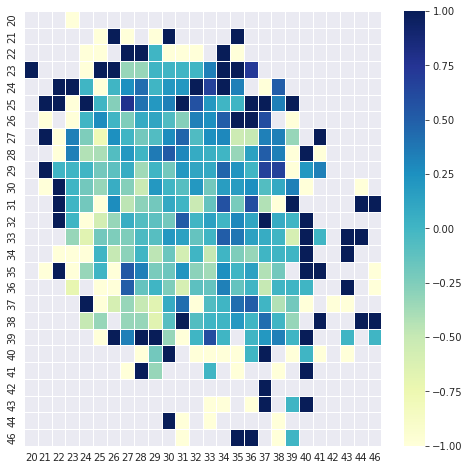

In [185]:
plt.figure(figsize=(8,8))
sns.set_style('dark')
sns.heatmap(age_matrix_result, linewidths=.5, cmap='YlGnBu')

In [ ]:
# ## Findings
# - 32 years old seems to be the winner. it has 2 very bright spots (against 31 years old and 37 years old)
# - 31, 37, and 30 years old are the losers. they were very prone against 28, and 32 years old). 
# - Though this only shows that those nubmers above are the most active

## Findings
- fighting against extreme age group seems to have clear result - most dark blue are on the edges
- interesting one is age 34 : seems to do bad against younger opponents (younger than 25)